In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fas_train = pd.read_csv('archive/fashion-mnist_train.csv')
fas_test = pd.read_csv('archive/fashion-mnist_test.csv')

ln 3 to ln 7 : https://www.kaggle.com/egenaz/fashion-mnist-modeling-w-randomforestclassifier 부분 참조

In [3]:
!pip install idx2numpy
import idx2numpy

In [4]:
file = 'archive/t10k-images-idx3-ubyte'
array = idx2numpy.convert_from_file(file)

In [5]:
array.shape

(10000, 28, 28)

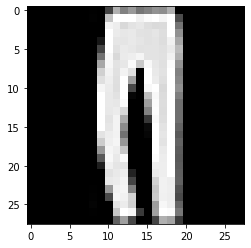

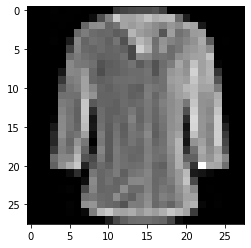

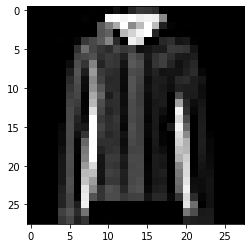

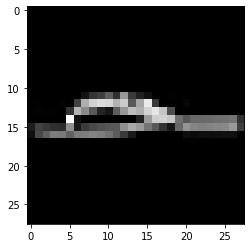

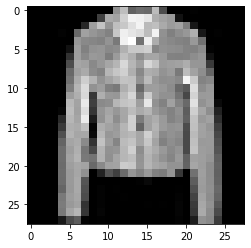

In [6]:
for i in [2, 4, 6, 8, 10]:
    plt.imshow(array[i], cmap = 'gray')
    plt.show()

In [7]:
print(fas_train.shape)
print(fas_test.shape)

(60000, 785)
(10000, 785)


In [8]:
fas_train['label'].value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

0 T-shirt/top  
1 Trouser  
2 Pullover  
3 Dress  
4 Coat  
5 Sandal  
6 Shirt  
7 Sneaker  
8 Bag  
9 Ankle boot

### 데이터 전처리

train데이터는 클래스별로 6000개씩 데이터가 있는데 60000개의 데이터로 돌리기에는  
시간이 너무 많이 소요(아래에서 실험)  

=> 프로젝트임을 고려하여 많은 시간과 정확도보다는 많은 테스트, 성능 향상 등에 초점  

=> 각 클래스별로 랜덤하게 1000개씩을 뽑아 10000개의 데이터로 활용하고자 함  

In [9]:
# 비어있는 DataFrame 생성
fas_train_random = pd.DataFrame()

# 각 클래스에서 1000개를 랜덤하게 뽑아서 fas_train_random에 저장
for i in range(10) :
    fas_ = fas_train[fas_train['label'] == i].sample(n=1000)
    fas_train_random = fas_train_random.append(fas_)

In [10]:
fas_train_random.shape

(10000, 785)

In [11]:
fas_train_random.head(20)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
27629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
57308,0,0,0,0,0,0,0,0,0,0,...,123,119,131,38,0,0,0,0,0,0
49291,0,0,0,0,0,0,0,0,0,0,...,62,127,68,181,215,122,0,0,0,0
40433,0,0,0,0,7,133,108,98,113,143,...,0,0,0,4,0,46,139,126,59,0
40932,0,0,0,0,0,0,0,1,0,3,...,144,129,73,0,0,2,0,0,0,0
38714,0,0,0,0,0,0,0,0,0,0,...,111,93,87,15,0,0,0,0,0,0
38899,0,0,0,0,0,0,1,0,0,0,...,93,96,83,0,0,0,0,0,0,0
4042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13547,0,0,0,0,0,0,2,0,0,0,...,19,0,0,0,1,0,0,0,0,0
12028,0,0,0,0,0,0,0,1,3,3,...,0,0,0,1,3,0,0,0,0,0


현재 클래스가 0부터 9까지 정렬되어있는 상태이므로 이를 적절하게 섞어줌

In [12]:
fas_train_new = fas_train_random.sample(frac = 1)

In [13]:
fas_train_new.head(20)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
19828,1,0,0,0,0,0,0,1,0,0,...,194,170,108,69,6,0,0,0,0,0
42162,0,0,0,0,0,0,0,0,0,0,...,154,156,160,0,0,1,0,0,0,0
51591,2,0,0,0,0,0,0,0,0,0,...,2,0,0,0,1,0,0,0,0,0
26579,6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19087,6,0,0,0,0,0,0,0,0,4,...,0,0,0,151,69,3,0,0,0,0
52806,3,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
14354,3,0,0,0,0,0,0,0,0,1,...,163,57,0,0,1,0,0,0,0,0
5562,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57014,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41202,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,173,110,61,0,0,0


##### 원본 데이터(60000) KNN 검증

시간 측정을 위해 원본 데이터(60000행)로 knn과 cross_Validation을 사용한 결과  

약 30분 이상의 시간이 소요됨.

In [17]:
X_train, X_val, y_train, y_val = train_test_split(fas_train.drop(['label'], axis = 1), fas_train['label'], test_size = 0.2, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

cvs = cross_val_score(clf, X = X_val, y = y_val, cv = 5)

In [18]:
print(cvs)

[0.8275     0.81791667 0.81416667 0.82458333 0.81583333]


fas_train_new 데이터의 80%를 훈련 데이터로, 20%를 검증 데이터로 사용

In [19]:
X = fas_train_new.drop(['label'], axis = 1)
y = fas_train_new['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

검증 데이터에 대해서 전체 데이터를 사용했을 때보다 조금 떨어진 성능을 보임

##### KNN을 통한 분류(검증 데이터)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

cvs = cross_val_score(knn, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.79   0.7575 0.775  0.77   0.8025]


In [21]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[167   0   7   4   1   0  24   0   1   0]
 [  2 201   2   1   0   0   2   0   0   1]
 [  9   0 145   2  28   0  14   0   0   0]
 [ 11   0   3 151   8   0   6   0   1   0]
 [  1   0  28   7 150   0  27   0   0   0]
 [  0   0   0   0   0 158   0  39   0  14]
 [ 44   0  33   4  12   0 111   0   4   0]
 [  0   0   0   0   0   2   0 168   0  17]
 [  4   1   4   1   1   0   2   1 182   0]
 [  0   0   1   0   0   0   0   4   0 189]]


In [22]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       204
           1       1.00      0.96      0.98       209
           2       0.65      0.73      0.69       198
           3       0.89      0.84      0.86       180
           4       0.75      0.70      0.73       213
           5       0.99      0.75      0.85       211
           6       0.60      0.53      0.56       208
           7       0.79      0.90      0.84       187
           8       0.97      0.93      0.95       196
           9       0.86      0.97      0.91       194

    accuracy                           0.81      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.82      0.81      0.81      2000



##### KNN을 통한 분류(테스트 데이터)

In [23]:
# 테스트 세트 준비
X_test = fas_test.drop(['label'], axis = 1)
y_test = fas_test['label']

y_test_pred = knn.predict(X_test)

In [24]:
cvs = cross_val_score(knn, X = X_test, y = y_test, cv = 5)
print(cvs)

[0.814  0.8215 0.8165 0.804  0.833 ]


In [25]:
print("테스트 데이터 : ")
print(confusion_matrix(y_test, y_test_pred))

테스트 데이터 : 
[[821   1  30  17   4   0 114   1  12   0]
 [ 12 956   6  16   2   0   8   0   0   0]
 [ 28   2 770  12 106   0  78   1   3   0]
 [ 64  17  12 861  30   0  16   0   0   0]
 [  7   0 164  50 697   0  81   0   1   0]
 [  5   0   2   1   0 730  10 153   5  94]
 [222   1 136  23  67   0 544   0   7   0]
 [  0   0   0   0   0   9   0 907   0  84]
 [  9   2  24   4   9   0  17  11 921   3]
 [  0   0   1   0   0   9   0  39   0 951]]


In [26]:
print("테스트 데이터 : ")
print(classification_report(y_test, y_test_pred))

테스트 데이터 : 
              precision    recall  f1-score   support

           0       0.70      0.82      0.76      1000
           1       0.98      0.96      0.97      1000
           2       0.67      0.77      0.72      1000
           3       0.88      0.86      0.87      1000
           4       0.76      0.70      0.73      1000
           5       0.98      0.73      0.84      1000
           6       0.63      0.54      0.58      1000
           7       0.82      0.91      0.86      1000
           8       0.97      0.92      0.95      1000
           9       0.84      0.95      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



##### KNN 결과 분석

1. 검증 데이터에 비해서 테스트 데이터가 조금 더 정확한 결과를 보임  
2. 4번(코트)과 6번(셔츠)가 비교적 낮은 정확도를 보임  
3. 비교적 안정적인 결과를 보임

##### RandomForest를 통한 분류(검증 데이터)

1. n_estimators = 10, max_depth = 5  
- 시간을 계산하기 위해서 작은 값으로 설정(1초 이내)  
- 정확도가 매우 낮음(6번의 경우 f1점수가 : 0.12)

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

cvs = cross_val_score(rf, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.765  0.7525 0.695  0.7325 0.775 ]


In [28]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[166   1  11  20   3   1   1   0   1   0]
 [  0 181   0  28   0   0   0   0   0   0]
 [  3   0 133   2  55   0   3   0   2   0]
 [ 10   1   6 158   4   0   1   0   0   0]
 [  2   0  28  24 155   0   1   0   3   0]
 [  0   0   0   0   0 181   0  20   2   8]
 [ 52   0  52  16  62   1  14   0  11   0]
 [  0   0   0   0   0   6   0 155   0  26]
 [  0   0   9   5   4   1   0   0 177   0]
 [  0   0   0   1   0   4   0  12   0 177]]


In [29]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       204
           1       0.99      0.87      0.92       209
           2       0.56      0.67      0.61       198
           3       0.62      0.88      0.73       180
           4       0.55      0.73      0.62       213
           5       0.93      0.86      0.89       211
           6       0.70      0.07      0.12       208
           7       0.83      0.83      0.83       187
           8       0.90      0.90      0.90       196
           9       0.84      0.91      0.87       194

    accuracy                           0.75      2000
   macro avg       0.76      0.75      0.73      2000
weighted avg       0.76      0.75      0.72      2000



2. n_estimators = 100, max_depth = 20  
- 시간 : 약 40초 내외  
- 성능은 향상(6번에 대한 정확도가 비약적으로 상승, 다른 부분들도 준수)

In [30]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 20, random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

cvs = cross_val_score(rf, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.8225 0.805  0.81   0.8175 0.795 ]


In [31]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[170   0   5   7   1   0  21   0   0   0]
 [  1 203   1   3   0   0   1   0   0   0]
 [  2   0 151   3  31   0  10   0   1   0]
 [  5   0   1 161   8   0   4   0   1   0]
 [  1   0  17   8 173   0  12   0   2   0]
 [  0   0   0   0   0 195   0  11   2   3]
 [ 34   0  23   6  23   0 115   0   7   0]
 [  0   0   0   0   0   6   0 165   0  16]
 [  1   0   2   1   2   1   2   0 187   0]
 [  0   0   0   0   0   4   0   8   0 182]]


In [32]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       204
           1       1.00      0.97      0.99       209
           2       0.76      0.76      0.76       198
           3       0.85      0.89      0.87       180
           4       0.73      0.81      0.77       213
           5       0.95      0.92      0.94       211
           6       0.70      0.55      0.62       208
           7       0.90      0.88      0.89       187
           8       0.94      0.95      0.94       196
           9       0.91      0.94      0.92       194

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



3. GridSearch를 통해서 최적의 파라미터 추출
- 시간 : 2시간 이상
- 성능이 2번에 비해서 오히려 안좋음 => 조건을 많이 주는 것이 오히려 안좋을 수 있다고 판단

In [37]:
params = {'max_depth':[30, 50, 70],
          'min_samples_leaf':[10, 15, 20],
          'min_samples_split':[8, 16, 20],
          'n_estimators':[100, 200, 400, 600]
         }

In [38]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=0)

grid_cv = GridSearchCV(rf, params, cv=2)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [30, 50, 70],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100, 200, 400, 600]})

In [39]:
grid_cv.best_params_

{'max_depth': 30,
 'min_samples_leaf': 10,
 'min_samples_split': 8,
 'n_estimators': 600}

In [40]:
rf = RandomForestClassifier(n_estimators=600, max_depth=30, min_samples_leaf=10, min_samples_split=8, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

cvs = cross_val_score(rf, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.8225 0.7875 0.785  0.81   0.79  ]


In [41]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[165   1   4   9   0   0  24   0   1   0]
 [  1 201   3   3   0   0   1   0   0   0]
 [  4   0 146   1  39   1   5   0   2   0]
 [  5   1   1 160   7   0   6   0   0   0]
 [  1   0  14  10 173   0  14   0   1   0]
 [  0   0   0   0   0 193   0  13   1   4]
 [ 37   0  27   8  21   0 108   0   7   0]
 [  0   0   0   0   0   4   0 163   0  20]
 [  0   0   2   3   2   1   2   0 186   0]
 [  0   0   0   0   0   3   0   6   0 185]]


In [42]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       204
           1       0.99      0.96      0.98       209
           2       0.74      0.74      0.74       198
           3       0.82      0.89      0.86       180
           4       0.71      0.81      0.76       213
           5       0.96      0.91      0.93       211
           6       0.68      0.52      0.59       208
           7       0.90      0.87      0.88       187
           8       0.94      0.95      0.94       196
           9       0.89      0.95      0.92       194

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



4. n_estimators = 500, max_depth = 20

In [43]:
rf = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

cvs = cross_val_score(rf, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.8325 0.8025 0.8025 0.8225 0.7975]


In [44]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[169   1   5   7   1   0  20   0   1   0]
 [  1 203   1   3   0   0   1   0   0   0]
 [  2   0 151   3  33   0   7   0   2   0]
 [  5   0   0 162   6   0   7   0   0   0]
 [  1   0  16   9 173   0  13   0   1   0]
 [  0   0   0   0   0 196   0  10   2   3]
 [ 34   0  25   8  20   0 114   0   7   0]
 [  0   0   0   0   0   3   0 167   0  17]
 [  1   0   2   1   2   0   1   0 189   0]
 [  0   0   0   0   0   4   0   6   0 184]]


In [45]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       204
           1       1.00      0.97      0.98       209
           2       0.76      0.76      0.76       198
           3       0.84      0.90      0.87       180
           4       0.74      0.81      0.77       213
           5       0.97      0.93      0.95       211
           6       0.70      0.55      0.61       208
           7       0.91      0.89      0.90       187
           8       0.94      0.96      0.95       196
           9       0.90      0.95      0.92       194

    accuracy                           0.85      2000
   macro avg       0.85      0.86      0.85      2000
weighted avg       0.85      0.85      0.85      2000



##### RandomForest를 통한 분류(테스트 데이터)

테스트용 데이터 검증 모델로 n_estimators = 500, max_depth = 20 옵션을 사용

In [46]:
y_test_pred = rf.predict(X_test)

In [48]:
cvs = cross_val_score(rf, X = X_test, y = y_test, cv = 5)
print(cvs)

[0.859  0.863  0.8615 0.8535 0.8605]


In [49]:
print("테스트 데이터 : ")
print(confusion_matrix(y_test, y_test_pred))

테스트 데이터 : 
[[807   1  18  60   2   2  95   0  15   0]
 [  2 964   6  21   1   1   5   0   0   0]
 [  8   3 777   9 135   1  54   0  13   0]
 [ 22  10   6 920  22   0  19   0   1   0]
 [  1   1  69  41 848   0  36   0   4   0]
 [  0   0   0   0   0 923   0  50   5  22]
 [177   4 118  34  90   0 555   0  22   0]
 [  0   0   0   0   0  31   0 902   1  66]
 [  1   1   9   2   4   3   9   4 966   1]
 [  0   0   1   0   0  12   0  48   3 936]]


In [50]:
print("테스트 데이터 : ")
print(classification_report(y_test, y_test_pred))

테스트 데이터 : 
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.77      0.78      0.78      1000
           3       0.85      0.92      0.88      1000
           4       0.77      0.85      0.81      1000
           5       0.95      0.92      0.94      1000
           6       0.72      0.56      0.63      1000
           7       0.90      0.90      0.90      1000
           8       0.94      0.97      0.95      1000
           9       0.91      0.94      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



##### RandomForest 결과 분석

1. 검증 데이터에 비해서 테스트 데이터가 조금 더 정확한 결과를 보임  
2. KNN에 비하면 전체적으로 높은 정확도  
3. 6번은 정확도가 아직 많이 부족하지만 다른 클래스들은 비교적 잘 분류함

##### XGBoost을 통한 분류(검증 데이터)

1. default  
- 전체적인 정확도는 랜덤 포레스트와 비슷함
- 6번에 대한 정확도가 많이 올라감 => XGBoost을 통해서 전체적인 정확도를 보장할 수 있다고 판단

In [52]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)

cvs = cross_val_score(xgb, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:50:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:52:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:52:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:53:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:53:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.865  0.795  0.805  0.815  0.8075]


In [53]:
print(confusion_matrix(y_val, y_pred))

[[173   0   4   9   1   0  17   0   0   0]
 [  1 204   0   2   0   0   2   0   0   0]
 [  7   0 159   1  21   0   9   0   1   0]
 [  5   0   3 161   8   0   3   0   0   0]
 [  0   0  15   6 180   0  12   0   0   0]
 [  0   0   0   0   0 197   0  11   0   3]
 [ 24   0  26   6  14   0 133   0   5   0]
 [  0   0   0   0   0   1   0 175   0  11]
 [  1   0   1   1   4   0   4   0 185   0]
 [  0   0   0   0   0   2   0   5   0 187]]


In [56]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       204
           1       1.00      0.98      0.99       209
           2       0.76      0.80      0.78       198
           3       0.87      0.89      0.88       180
           4       0.79      0.85      0.82       213
           5       0.98      0.93      0.96       211
           6       0.74      0.64      0.69       208
           7       0.92      0.94      0.93       187
           8       0.97      0.94      0.96       196
           9       0.93      0.96      0.95       194

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



2. 초기값 설정 (참고 : https://www.kaggle.com/lifesailor/xgboost)
- 평균적으로 0.88의 정확도를 보임
- 좋은 모델이지만 시간이 많이 소요(cross_validation 과정에서 한 번당 약 20분의 시간이 필요)
- n_estimators를 조금 줄이고, 다른 파라미터를 조절하고자 함

In [57]:
xgb = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    scale_pos_weight=1,
    )
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)

cvs = cross_val_score(xgb, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:25:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:25:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:33:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:33:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.8575 0.8175 0.815  0.8225 0.835 ]


In [58]:
print(confusion_matrix(y_val, y_pred))

[[173   1   3   9   0   0  18   0   0   0]
 [  1 205   0   1   0   0   2   0   0   0]
 [  5   0 158   2  23   0   9   0   1   0]
 [  6   1   1 160   7   0   5   0   0   0]
 [  0   0  19   7 173   0  14   0   0   0]
 [  0   0   0   0   0 195   0  12   1   3]
 [ 20   0  22   7  16   0 139   0   4   0]
 [  0   0   0   0   0   1   0 175   0  11]
 [  1   0   2   0   3   0   3   1 186   0]
 [  0   0   0   0   0   2   0   5   0 187]]


In [59]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       204
           1       0.99      0.98      0.99       209
           2       0.77      0.80      0.78       198
           3       0.86      0.89      0.87       180
           4       0.78      0.81      0.80       213
           5       0.98      0.92      0.95       211
           6       0.73      0.67      0.70       208
           7       0.91      0.94      0.92       187
           8       0.97      0.95      0.96       196
           9       0.93      0.96      0.95       194

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



3. 파라미터 튜닝
- 2번보다 정확도가 떨어짐 다른 방향을 고려해봄

In [60]:
xgb = XGBClassifier(
    learning_rate =0.01,
    n_estimators=400,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    )
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)

cvs = cross_val_score(xgb, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:50:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:58:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:02:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:06:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.8575 0.795  0.8175 0.8075 0.8075]


In [61]:
print(confusion_matrix(y_val, y_pred))

[[172   1   4   8   0   0  18   0   1   0]
 [  2 200   2   4   0   0   1   0   0   0]
 [  4   0 149   2  32   1   9   0   1   0]
 [  6   1   1 159   8   0   5   0   0   0]
 [  0   0  18   9 169   0  17   0   0   0]
 [  0   0   0   0   0 192   0  15   1   3]
 [ 28   0  24   7  22   1 121   0   5   0]
 [  0   0   0   0   0   1   0 171   0  15]
 [  1   0   2   3   5   0   4   0 181   0]
 [  0   0   0   0   0   1   0   3   0 190]]


In [62]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       204
           1       0.99      0.96      0.97       209
           2       0.74      0.75      0.75       198
           3       0.83      0.88      0.85       180
           4       0.72      0.79      0.75       213
           5       0.98      0.91      0.94       211
           6       0.69      0.58      0.63       208
           7       0.90      0.91      0.91       187
           8       0.96      0.92      0.94       196
           9       0.91      0.98      0.95       194

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



4. 파라미터 튜닝
- n_estimators를 유지하고, 다른 매개변수를 조절하고자 함
- 초기값 모델(1번)에는 조금 못 미치는 결과

In [63]:
xgb = XGBClassifier(
    learning_rate =0.01,
    n_estimators=1000,
    max_depth=3,
    min_child_weight=5,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    )
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)

cvs = cross_val_score(xgb, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:22:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:24:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.8625 0.8025 0.8    0.82   0.8225]


In [64]:
print(confusion_matrix(y_val, y_pred))

[[167   1   3  10   0   0  22   0   1   0]
 [  2 202   1   2   1   0   1   0   0   0]
 [  3   0 150   1  30   1  12   0   1   0]
 [  6   1   1 158   9   0   5   0   0   0]
 [  0   0  20   7 168   0  18   0   0   0]
 [  0   0   0   0   0 195   0  12   1   3]
 [ 32   0  22   7  20   0 123   0   4   0]
 [  0   0   0   0   0   0   0 175   0  12]
 [  0   0   1   2   4   0   4   0 185   0]
 [  0   0   0   0   0   1   0   4   0 189]]


In [65]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       204
           1       0.99      0.97      0.98       209
           2       0.76      0.76      0.76       198
           3       0.84      0.88      0.86       180
           4       0.72      0.79      0.76       213
           5       0.99      0.92      0.96       211
           6       0.66      0.59      0.63       208
           7       0.92      0.94      0.93       187
           8       0.96      0.94      0.95       196
           9       0.93      0.97      0.95       194

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



5. GridSearch를 통해서 최적의 파라미터 추출
- 시간 : 3시간 30분
- 초기값 모델에서 max_depth, min_child_weight, gamma만 변경하여 최적의 파라미터를 찾고자 함

In [68]:
params = {'max_depth':[3,4,5],
          'min_child_weight':[1,3,5],
          'gamma':[0.1,0.2]
         }

xgb = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    )

grid_cv = GridSearchCV(xgb, params, cv=2)
grid_cv.fit(X_train, y_train)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:28:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:39:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:43:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:51:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:04:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:10:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:15:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:24:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:34:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:41:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:46:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:55:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:05:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:23:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:27:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:40:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:45:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:50:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:00:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:32:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.8,
                                     tree_method=No

In [69]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'gamma': 0.1, 'max_depth': 4, 'min_child_weight': 1}
0.8612500000000001


##### XGBoost를 통한 분류(테스트 데이터)

테스트용 데이터 검증 모델로 GridSearch의 결과로 나온 옵션을 사용

In [71]:
xgb = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=4,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    )
xgb.fit(X_train, y_train)

y_test_pred = xgb.predict(X_test)

[15:07:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [72]:
cvs = cross_val_score(xgb, X = X_test, y = y_test, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:26:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:28:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:33:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:36:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.8575 0.8025 0.805  0.815  0.825 ]


In [73]:
print("테스트 데이터 : ")
print(confusion_matrix(y_test, y_test_pred))

테스트 데이터 : 
[[829   0  16  43   1   1  93   2  15   0]
 [  3 973   5  13   0   2   4   0   0   0]
 [ 13   2 821  12  77   0  67   0   8   0]
 [ 20   8   9 918  22   0  23   0   0   0]
 [  0   0  64  33 845   1  54   0   3   0]
 [  0   0   0   1   0 934   0  39   4  22]
 [141   5  92  27  65   1 658   0  11   0]
 [  0   0   0   0   0  15   0 929   1  55]
 [  1   1   7   3   3   4  12   2 965   2]
 [  0   0   0   0   0   5   1  47   4 943]]


In [74]:
print("테스트 데이터 : ")
print(classification_report(y_test, y_test_pred))

테스트 데이터 : 
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.81      0.82      0.82      1000
           3       0.87      0.92      0.90      1000
           4       0.83      0.84      0.84      1000
           5       0.97      0.93      0.95      1000
           6       0.72      0.66      0.69      1000
           7       0.91      0.93      0.92      1000
           8       0.95      0.96      0.96      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



##### XGBoost 결과 분석

1. 검증 데이터에 비해서 테스트 데이터가 조금 더 정확한 결과를 보임  
2. 이전의 분류기에 비하면 높은 정확도
3. 2번(초기값)과 전체적인 정확도는 비슷하지만, 2번이 특정 값들을 더 잘 분류했다면 최종 결과는 전체적으로 골고루 잘 분류한듯 함
4. 6번에 대한 정확도는 0.7 내외가 한계라고 판단

##### MLP를 통한 분류(검증 데이터)

1. 초기값 설정  
- 데이터의 크기를 고려하여 solver='adam'을 제공하였고, 데이터가 비교적 단순하여 레이어의 사이즈를 2개의 은닉층에 10개의 노드를 사용함.
- 모두 3으로 예측

In [75]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10),
                    alpha=0.0001,
                    solver='adam',
                    max_iter=100,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [77]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.1075 0.105  0.1025 0.105  0.105 ]


In [78]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[  0   0   0 204   0   0   0   0   0   0]
 [  0   0   0 209   0   0   0   0   0   0]
 [  0   0   0 198   0   0   0   0   0   0]
 [  0   0   0 180   0   0   0   0   0   0]
 [  0   0   0 213   0   0   0   0   0   0]
 [  0   0   0 211   0   0   0   0   0   0]
 [  0   0   0 208   0   0   0   0   0   0]
 [  0   0   0 187   0   0   0   0   0   0]
 [  0   0   0 196   0   0   0   0   0   0]
 [  0   0   0 194   0   0   0   0   0   0]]


In [79]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       204
           1       0.00      0.00      0.00       209
           2       0.00      0.00      0.00       198
           3       0.09      1.00      0.17       180
           4       0.00      0.00      0.00       213
           5       0.00      0.00      0.00       211
           6       0.00      0.00      0.00       208
           7       0.00      0.00      0.00       187
           8       0.00      0.00      0.00       196
           9       0.00      0.00      0.00       194

    accuracy                           0.09      2000
   macro avg       0.01      0.10      0.02      2000
weighted avg       0.01      0.09      0.01      2000



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. 조금 더 복잡한 모델
- 이번엔 모두 8로 예측 => 아직은 너무 간단한 모델이라고 생각

In [80]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100),
                    alpha=0.001,
                    solver='sgd',
                    max_iter=100,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [81]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.105 0.105 0.105 0.105 0.105]


In [82]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[  0   0   0   0   0   0   0   0 204   0]
 [  0   0   0   0   0   0   0   0 209   0]
 [  0   0   0   0   0   0   0   0 198   0]
 [  0   0   0   0   0   0   0   0 180   0]
 [  0   0   0   0   0   0   0   0 213   0]
 [  0   0   0   0   0   0   0   0 211   0]
 [  0   0   0   0   0   0   0   0 208   0]
 [  0   0   0   0   0   0   0   0 187   0]
 [  0   0   0   0   0   0   0   0 196   0]
 [  0   0   0   0   0   0   0   0 194   0]]


In [83]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       204
           1       0.00      0.00      0.00       209
           2       0.00      0.00      0.00       198
           3       0.00      0.00      0.00       180
           4       0.00      0.00      0.00       213
           5       0.00      0.00      0.00       211
           6       0.00      0.00      0.00       208
           7       0.00      0.00      0.00       187
           8       0.10      1.00      0.18       196
           9       0.00      0.00      0.00       194

    accuracy                           0.10      2000
   macro avg       0.01      0.10      0.02      2000
weighted avg       0.01      0.10      0.02      2000



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. 파라미터 튜닝
- 은닉층을 복잡하게 설계하니 다양한 클래스로 예측함을 확인 => 조금 더 복잡하게 하고자 함

In [84]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 100, 100, 100, 10),
                    alpha=0.001,
                    solver='sgd',
                    max_iter=100,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [85]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.39   0.2575 0.2    0.1975 0.2125]


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [86]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[ 77   0  71  48   0   0   0   0   7   1]
 [  0 199   3   6   0   0   0   0   0   1]
 [ 50   1 119  10   0   0   2   0  16   0]
 [ 25  40  18  94   0   0   0   1   2   0]
 [ 90   2  76  38   0   0   1   0   6   0]
 [  0   0   0   0   0 101   0  58   8  44]
 [ 54   2 110  24   0   0   1   0  17   0]
 [  0   0   0   0   0  54   0 118  10   5]
 [  1   0   6   2   0   0   1   2 184   0]
 [  0   0   0   0   0  17   0   2   0 175]]


In [87]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.26      0.38      0.31       204
           1       0.82      0.95      0.88       209
           2       0.30      0.60      0.40       198
           3       0.42      0.52      0.47       180
           4       0.00      0.00      0.00       213
           5       0.59      0.48      0.53       211
           6       0.20      0.00      0.01       208
           7       0.65      0.63      0.64       187
           8       0.74      0.94      0.83       196
           9       0.77      0.90      0.83       194

    accuracy                           0.53      2000
   macro avg       0.47      0.54      0.49      2000
weighted avg       0.47      0.53      0.48      2000



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. 파라미터 튜닝
- 더욱 복잡한 은닉층을 만듦
- 결과는 아직 좋지 않지만 

In [88]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 200, 200, 100, 100),
                    alpha=0.001,
                    solver='sgd',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [89]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.795  0.7475 0.78   0.79   0.77  ]


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [90]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[162   0   5  10   0   0  27   0   0   0]
 [  1 204   1   3   0   0   0   0   0   0]
 [  7   1 143   1  22   0  22   0   2   0]
 [  9   2   1 153   9   0   4   0   1   1]
 [  3   0  25   5 160   0  20   0   0   0]
 [  0   0   0   0   0 184   0  14   4   9]
 [ 30   0  23   5  18   0 127   0   5   0]
 [  0   0   0   0   0   9   0 166   0  12]
 [  0   0   4   3   2   1   3   1 182   0]
 [  0   0   0   0   0   6   0   8   0 180]]


In [91]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       204
           1       0.99      0.98      0.98       209
           2       0.71      0.72      0.71       198
           3       0.85      0.85      0.85       180
           4       0.76      0.75      0.75       213
           5       0.92      0.87      0.90       211
           6       0.63      0.61      0.62       208
           7       0.88      0.89      0.88       187
           8       0.94      0.93      0.93       196
           9       0.89      0.93      0.91       194

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



5. 파라미터 튜닝
- cross_validation의 결과는 그렇게 좋지는 않지만 꽤나 안정적인 성능

In [92]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 200, 200, 300, 200, 200, 100, 100),
                    alpha=0.001,
                    solver='sgd',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [93]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.82   0.755  0.7925 0.76   0.7775]


In [94]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[160   1   6  10   0   1  24   0   2   0]
 [  1 202   1   3   0   0   2   0   0   0]
 [  6   0 147   2  25   1  14   0   3   0]
 [  8   2   2 155   7   0   5   0   1   0]
 [  1   0  20   9 171   0  11   0   1   0]
 [  0   0   0   0   0 191   0  14   1   5]
 [ 22   1  17   7  20   1 134   0   6   0]
 [  0   0   0   0   0   4   0 170   0  13]
 [  2   1   3   1   2   1   4   1 180   1]
 [  0   0   0   0   0   1   0   8   0 185]]


In [95]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       204
           1       0.98      0.97      0.97       209
           2       0.75      0.74      0.75       198
           3       0.83      0.86      0.84       180
           4       0.76      0.80      0.78       213
           5       0.95      0.91      0.93       211
           6       0.69      0.64      0.67       208
           7       0.88      0.91      0.89       187
           8       0.93      0.92      0.92       196
           9       0.91      0.95      0.93       194

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



6. 파라미터 튜닝
- 은닉층의 수를 줄이고 노드 수를 증가시킴
- 이전과 비슷한 결과

In [96]:
mlp = MLPClassifier(hidden_layer_sizes=(200, 200, 200, 300, 200, 200, 200),
                    alpha=0.0001,
                    solver='sgd',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [97]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.815  0.79   0.805  0.77   0.7975]


In [98]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[159   2   4   8   1   2  28   0   0   0]
 [  0 204   0   3   1   0   0   0   0   1]
 [  5   0 149   1  29   0  13   0   1   0]
 [  8   1   1 157   8   0   4   0   1   0]
 [  1   1  21   6 170   0  13   0   1   0]
 [  0   0   0   0   0 183   1  19   1   7]
 [ 26   0  16   5  18   0 140   0   3   0]
 [  0   0   0   0   0   6   0 173   0   8]
 [  1   0   3   3   3   2   5   0 179   0]
 [  0   0   0   0   0   1   0   8   0 185]]


In [99]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       204
           1       0.98      0.98      0.98       209
           2       0.77      0.75      0.76       198
           3       0.86      0.87      0.87       180
           4       0.74      0.80      0.77       213
           5       0.94      0.87      0.90       211
           6       0.69      0.67      0.68       208
           7       0.86      0.93      0.89       187
           8       0.96      0.91      0.94       196
           9       0.92      0.95      0.94       194

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



7. 파라미터 튜닝
- 단순히 은닉층 수를 늘리고 노드 수를 늘린다고 결과가 좋지는 않음
- 적절한 조절이 필요

In [100]:
mlp = MLPClassifier(hidden_layer_sizes=(300, 300, 300, 300, 300, 300, 300, 300, 300),
                    alpha=0.0001,
                    solver='sgd',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [101]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.82   0.7525 0.7975 0.785  0.85  ]


In [102]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[164   0   8  10   0   1  21   0   0   0]
 [  0 203   2   3   0   0   0   0   0   1]
 [  6   0 153   2  23   1  13   0   0   0]
 [  8   1   3 153  10   0   2   0   3   0]
 [  0   0  26   8 159   0  19   0   1   0]
 [  0   0   0   0   0 189   0  14   1   7]
 [ 31   0  16   7  20   0 128   0   6   0]
 [  0   0   0   0   0   8   0 169   0  10]
 [  1   0   4   1   1   1   3   0 185   0]
 [  0   0   0   0   0   3   0   8   0 183]]


In [103]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       204
           1       1.00      0.97      0.98       209
           2       0.72      0.77      0.75       198
           3       0.83      0.85      0.84       180
           4       0.75      0.75      0.75       213
           5       0.93      0.90      0.91       211
           6       0.69      0.62      0.65       208
           7       0.88      0.90      0.89       187
           8       0.94      0.94      0.94       196
           9       0.91      0.94      0.93       194

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



8. 파라미터 튜닝
- 은닉층의 수가 감소 => 한 가지 클래스로 예측
- 은닉층은 10개에 가깝도록
- 이후에 알파 값을 조절

In [104]:
mlp = MLPClassifier(hidden_layer_sizes=(500, 500, 500),
                    alpha=0.01,
                    solver='sgd',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [105]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.45   0.095  0.0925 0.1025 0.0925]


In [106]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[  0   0   0   0   0   0   0 204   0   0]
 [  0   0   0   0   0   0   0 209   0   0]
 [  0   0   0   0   0   0   0 198   0   0]
 [  0   0   0   0   0   0   0 180   0   0]
 [  0   0   0   0   0   0   0 213   0   0]
 [  1   0   0   0   0   0   0 210   0   0]
 [  0   0   0   0   0   0   0 208   0   0]
 [  0   0   0   0   0   0   0 187   0   0]
 [  0   0   0   0   0   0   0 196   0   0]
 [  0   0   0   0   0   0   0 194   0   0]]


In [107]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       204
           1       0.00      0.00      0.00       209
           2       0.00      0.00      0.00       198
           3       0.00      0.00      0.00       180
           4       0.00      0.00      0.00       213
           5       0.00      0.00      0.00       211
           6       0.00      0.00      0.00       208
           7       0.09      1.00      0.17       187
           8       0.00      0.00      0.00       196
           9       0.00      0.00      0.00       194

    accuracy                           0.09      2000
   macro avg       0.01      0.10      0.02      2000
weighted avg       0.01      0.09      0.02      2000



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9. 파라미터 튜닝
- 은닉층의 수를 증가, node를 조절, alpha를 0.01로 변경
- 이전보다 뛰어나지는 못한 성능

In [108]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 300, 400, 500, 400, 300, 200, 100),
                    alpha=0.01,
                    solver='sgd',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [109]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.8075 0.75   0.7525 0.7925 0.8   ]


In [110]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[162   1   7   9   1   0  24   0   0   0]
 [  3 202   1   2   0   0   1   0   0   0]
 [  7   0 152   1  26   0  12   0   0   0]
 [ 11   2   3 151   6   0   6   0   1   0]
 [  1   1  21   7 166   0  17   0   0   0]
 [  0   0   0   0   0 193   0  12   1   5]
 [ 31   0  23   5  27   0 119   0   3   0]
 [  0   0   0   0   0   6   0 171   0  10]
 [  2   0   3   1   1   2   4   0 182   1]
 [  0   0   0   0   0   1   0   6   0 187]]


In [111]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       204
           1       0.98      0.97      0.97       209
           2       0.72      0.77      0.75       198
           3       0.86      0.84      0.85       180
           4       0.73      0.78      0.75       213
           5       0.96      0.91      0.93       211
           6       0.65      0.57      0.61       208
           7       0.90      0.91      0.91       187
           8       0.97      0.93      0.95       196
           9       0.92      0.96      0.94       194

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



10. 파라미터 튜닝
- 이제까지 가장 좋았던 파라미터(6.)을 가져와서 수정

In [112]:
mlp = MLPClassifier(hidden_layer_sizes=(200, 200, 200, 200, 200, 200, 200),
                    alpha=0.001,
                    solver='sgd',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [113]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.8125 0.7475 0.7825 0.765  0.8   ]


In [114]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[158   1   6  11   1   1  26   0   0   0]
 [  1 203   1   2   0   0   2   0   0   0]
 [  6   0 156   1  26   0   9   0   0   0]
 [  7   3   1 153  11   0   4   0   1   0]
 [  2   1  25   4 164   0  16   0   1   0]
 [  0   0   1   0   0 192   0  10   1   7]
 [ 27   1  25   4  15   0 134   0   2   0]
 [  0   0   0   0   0   4   0 173   0  10]
 [  3   0   3   1   2   0   3   0 184   0]
 [  0   0   0   0   0   5   0  12   0 177]]


In [115]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       204
           1       0.97      0.97      0.97       209
           2       0.72      0.79      0.75       198
           3       0.87      0.85      0.86       180
           4       0.75      0.77      0.76       213
           5       0.95      0.91      0.93       211
           6       0.69      0.64      0.67       208
           7       0.89      0.93      0.91       187
           8       0.97      0.94      0.96       196
           9       0.91      0.91      0.91       194

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



11. 파라미터 튜닝
- 이전과 비슷한 결과

In [116]:
mlp = MLPClassifier(hidden_layer_sizes=(300, 300, 300, 300, 300, 300, 300),
                    alpha=0.0001,
                    solver='sgd',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [117]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.815  0.7875 0.7975 0.795  0.81  ]


In [118]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[165   0   3  15   0   1  19   0   1   0]
 [  0 203   2   2   1   0   1   0   0   0]
 [  7   1 152   2  23   0  11   0   2   0]
 [  6   2   3 154  10   1   4   0   0   0]
 [  2   1  25   6 164   0  13   0   2   0]
 [  0   0   0   0   0 185   0  14   3   9]
 [ 27   1  18   6  20   0 130   0   6   0]
 [  0   0   0   0   0   5   0 174   0   8]
 [  4   0   4   1   3   3   2   0 179   0]
 [  0   0   0   0   0   5   0   9   0 180]]


In [119]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       204
           1       0.98      0.97      0.97       209
           2       0.73      0.77      0.75       198
           3       0.83      0.86      0.84       180
           4       0.74      0.77      0.76       213
           5       0.93      0.88      0.90       211
           6       0.72      0.62      0.67       208
           7       0.88      0.93      0.91       187
           8       0.93      0.91      0.92       196
           9       0.91      0.93      0.92       194

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



##### MLP를 통한 분류(테스트 데이터)

11. 의 결과를 사용  
- 해당 모델 선정 이유 : 다른 것들에 비해서 크게 좋지는 않지만 6번에 대한 예측이 좋고, 전체적으로 안정적이라고 판단

In [121]:
y_test_pred = mlp.predict(X_test)

In [124]:
cvs = cross_val_score(mlp, X = X_test, y = y_test, cv = 5)
print(cvs)

[0.8445 0.842  0.853  0.838  0.863 ]


In [125]:
print("테스트 데이터 : ")
print(confusion_matrix(y_test, y_test_pred))

테스트 데이터 : 
[[796   6  23  42   5   3 111   1  13   0]
 [  6 964   3  21   1   0   4   0   0   1]
 [ 25   5 754  17 103   3  84   0   9   0]
 [ 28  17  15 868  42   0  24   0   6   0]
 [  2   3  84  37 792   1  73   0   8   0]
 [  4   0   0   2   0 889   1  60  12  32]
 [143   5  93  33 101   0 609   0  15   1]
 [  0   0   0   0   0  39   0 918   0  43]
 [  8   3   9   2   9   9  12  11 935   2]
 [  0   0   0   0   0  21   0  48   0 931]]


In [126]:
print("테스트 데이터 : ")
print(classification_report(y_test, y_test_pred))

테스트 데이터 : 
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1000
           1       0.96      0.96      0.96      1000
           2       0.77      0.75      0.76      1000
           3       0.85      0.87      0.86      1000
           4       0.75      0.79      0.77      1000
           5       0.92      0.89      0.90      1000
           6       0.66      0.61      0.64      1000
           7       0.88      0.92      0.90      1000
           8       0.94      0.94      0.94      1000
           9       0.92      0.93      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



##### MLP 결과 분석

1. 파라미터 튜닝에 크게 영향을 받음을 확인 => 은닉층의 수가 적을 때, 한 클래스로만 예측
2. 정확도가 XGBoost에 비해서 크게 좋지 않음
3. 파라미터 조정이 어려워서 정확도를 높이기 위해서 더 많은 시도가 필요함

##### Voting을 통한 분류(검증 데이터)

1. hard

In [120]:
from sklearn.ensemble import VotingClassifier

vot= VotingClassifier(estimators=[('knn',knn),
                                         ('rf',rf),
                                         ('xgb', xgb)],
                             voting='hard')
vot.fit(X_train, y_train)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:09:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     n_estimators=500,
                                                     random_state=0)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.8, gamma=0.1,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=4, min_child_weight=1,
                                            missin

In [ ]:
cvs = cross_val_score(vot, X = X_val, y = y_val, cv = 5)
print(cvs)

In [ ]:
print(confusion_matrix(y_val, y_pred))

In [ ]:
print(classification_report(y_val, y_pred))

2. soft

In [ ]:
vot= VotingClassifier(estimators=[('knn',knn),
                                         ('rf',rf),
                                         ('xgb', xgb)],
                             voting='soft')
vot.fit(X_train, y_train)

In [ ]:
cvs = cross_val_score(vot, X = X_val, y = y_val, cv = 5)
print(cvs)

In [ ]:
print(confusion_matrix(y_val, y_pred))

In [ ]:
print(classification_report(y_val, y_pred))